In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn import grid_search
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
df_scaled = pd.read_csv('basketball_csvs/model_df_scaled_2016.csv')
df_unscaled = pd.read_csv('basketball_csvs/model_df_unscaled_2016.csv')

In [3]:
df_scaled.drop(['Unnamed: 0'], axis=1, inplace=True)
df_unscaled.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df_scaled.sort_values('Delta_Adj_OE', ascending=False)

,Name,Avg MPH Run O,Miles Run Per 36,Miles Run O Per 36,FG% Driving,PTS Per Drive,Assists Per Drive,TO Per Drive,FG%_inside5,Contested_eFG%,...,PctPtsPITP,PctFgAst2pt,PctFgUnAst2pt,PctFgAst3pt,PctFgUnAst3,PctFgmAst,PctFgmUnAst,Adj_OE_Season,Adj_OE_wowy,Delta_Adj_OE
75,Ty Lawson,-0.333480,-0.050714,-0.519007,-0.007601,-1.897461,1.992965,0.491159,-0.430686,0.572546,...,0.069921,-1.345174,1.345022,-0.433371,0.433169,-1.173858,1.173858,0.341486,2.144977,2.956012
51,Mike Dunleavy,1.111601,0.932740,1.668673,-2.404820,-0.154057,-1.639985,-2.087882,-0.159442,0.425965,...,-0.629987,1.494933,-1.494903,1.088154,-1.087999,1.581139,-1.581139,-0.294127,0.843231,1.619597
32,James Anderson,0.389060,0.886402,0.233449,-0.097819,-1.063659,-0.550100,1.006967,0.071114,-1.052070,...,0.715290,0.253356,-0.253406,0.068575,-0.068660,0.294406,-0.294406,-2.209587,-0.824107,1.475956
23,Garrett Temple,0.541174,0.730832,-0.134890,-0.600462,-0.760458,1.084728,-0.153601,-0.715492,0.035079,...,-0.557269,0.501671,-0.501705,0.648951,-0.648899,0.796285,-0.796285,-0.019828,0.921900,1.318520
35,Jeremy Lamb,0.351032,0.609786,0.877712,0.817249,1.216937,-0.692259,0.603291,0.396607,-0.490172,...,0.515317,-0.041519,0.041450,-0.590230,0.589990,-0.234169,0.234169,-0.198992,0.601014,1.295444
44,Luke Babbitt,1.339771,1.037578,1.252861,-0.123595,0.192458,-0.394402,-1.203639,-2.125958,-0.025996,...,0.197177,0.330954,-0.331000,0.735223,-0.735151,0.545346,-0.545346,-0.019917,0.867978,1.260342
76,Tyreke Evans,-0.143338,-1.324067,-0.353967,0.018176,-0.060765,0.036761,0.590353,-1.217292,-0.710045,...,0.924354,-1.396906,1.396751,-2.480373,2.479688,-1.600990,1.600990,0.568652,1.287756,1.256682
58,Otto Porter,0.997515,0.970649,0.245767,0.817249,-0.154057,1.266375,-0.024649,0.925532,0.132801,...,-0.330026,1.065554,-1.065552,0.845024,-0.844925,0.945781,-0.945781,1.191033,1.766639,1.213076
8,Bradley Beal,0.313003,0.218041,-0.175948,1.229674,0.937465,-0.332123,-0.230973,0.301671,-0.111502,...,0.033562,-0.232928,0.232847,-0.480429,0.480215,-0.260865,0.260865,-0.434016,0.363681,1.136037
18,Derrick Rose,0.084833,-0.090116,0.186345,0.946132,0.908849,-0.170477,-0.001467,-1.244417,-1.052070,...,1.042520,-1.298615,1.298465,0.374449,-0.374461,-1.579633,1.579633,-1.203036,-0.346762,1.098799


In [5]:
df_scaled.columns

Index([u'Name', u'Avg MPH Run O', u'Miles Run Per 36', u'Miles Run O Per 36',
       u'FG% Driving', u'PTS Per Drive', u'Assists Per Drive', u'TO Per Drive',
       u'FG%_inside5', u'Contested_eFG%', u'Pullup_eFG', u'eFG%_with_dribble',
       u'PctFGA2pt', u'PctFGA3pt', u'PctPts2pt', u'PctPts2ptMR', u'PctPts3pt',
       u'PctPtsFBPS', u'PctPtsFT', u'PctPtsOffTO', u'PctPtsPITP',
       u'PctFgAst2pt', u'PctFgUnAst2pt', u'PctFgAst3pt', u'PctFgUnAst3',
       u'PctFgmAst', u'PctFgmUnAst', u'Adj_OE_Season', u'Adj_OE_wowy',
       u'Delta_Adj_OE'],
      dtype='object')

In [6]:
scaled_1 = df_scaled[[u'Avg MPH Run O', u'Miles Run Per 36',
       u'Miles Run O Per 36', u'FG% Driving', u'PTS Per Drive',
       u'Assists Per Drive', u'TO Per Drive', u'FG%_inside5',
       u'Contested_eFG%', u'Pullup_eFG', u'eFG%_with_dribble',u'Adj_OE_Season']]

In [7]:
scaled_2 = df_scaled[[u'PctFGA2pt',u'PctFGA3pt', u'PctPts2pt', u'PctPts2ptMR',
        u'PctPts3pt', u'PctPtsFBPS',u'PctPtsFT', u'PctPtsOffTO', u'PctPtsPITP', u'PctFgAst2pt',
       u'PctFgUnAst2pt', u'PctFgAst3pt', u'PctFgUnAst3', u'PctFgmAst',
       u'PctFgmUnAst', u'Adj_OE_Season']]

In [8]:
scaled_1.corr()

,Avg MPH Run O,Miles Run Per 36,Miles Run O Per 36,FG% Driving,PTS Per Drive,Assists Per Drive,TO Per Drive,FG%_inside5,Contested_eFG%,Pullup_eFG,eFG%_with_dribble,Adj_OE_Season
Avg MPH Run O,1.000000,0.899194,0.854994,0.028858,-0.104490,0.000601,0.025718,-0.001107,0.008328,-0.063728,0.040957,0.264438
Miles Run Per 36,0.899194,1.000000,0.851887,-0.051599,-0.200628,-0.011560,0.052796,0.056454,-0.052891,-0.188622,0.006484,0.246028
Miles Run O Per 36,0.854994,0.851887,1.000000,-0.072296,-0.223950,-0.019532,0.012895,-0.065722,-0.066629,-0.110719,-0.081058,0.164955
FG% Driving,0.028858,-0.051599,-0.072296,1.000000,0.527679,0.180811,0.021456,0.487660,0.260264,0.011655,0.601540,0.363325
PTS Per Drive,-0.104490,-0.200628,-0.223950,0.527679,1.000000,-0.499330,-0.135402,0.360903,0.341758,0.066889,0.466429,0.002462
Assists Per Drive,0.000601,-0.011560,-0.019532,0.180811,-0.499330,1.000000,-0.002778,-0.140436,-0.197785,-0.044383,0.027358,0.338897
TO Per Drive,0.025718,0.052796,0.012895,0.021456,-0.135402,-0.002778,1.000000,-0.130045,-0.128553,0.092627,0.110572,0.022938
FG%_inside5,-0.001107,0.056454,-0.065722,0.487660,0.360903,-0.140436,-0.130045,1.000000,0.483541,-0.052800,0.378948,0.284429
Contested_eFG%,0.008328,-0.052891,-0.066629,0.260264,0.341758,-0.197785,-0.128553,0.483541,1.000000,0.058288,0.330359,0.119803
Pullup_eFG,-0.063728,-0.188622,-0.110719,0.011655,0.066889,-0.044383,0.092627,-0.052800,0.058288,1.000000,0.357678,0.002317


In [9]:
scaled_2.corr()

,PctFGA2pt,PctFGA3pt,PctPts2pt,PctPts2ptMR,PctPts3pt,PctPtsFBPS,PctPtsFT,PctPtsOffTO,PctPtsPITP,PctFgAst2pt,PctFgUnAst2pt,PctFgAst3pt,PctFgUnAst3,PctFgmAst,PctFgmUnAst,Adj_OE_Season
PctFGA2pt,1.000000,-1.000000,0.944226,0.503446,-0.964312,-0.132855,0.498032,-0.144038,0.660437,-0.393640,0.393691,-0.127598,0.127684,-0.611248,0.611248,0.094749
PctFGA3pt,-1.000000,1.000000,-0.944276,-0.503570,0.964295,0.133023,-0.497855,0.144028,-0.660397,0.393664,-0.393716,0.127633,-0.127719,0.611272,-0.611272,-0.094730
PctPts2pt,0.944226,-0.944276,1.000000,0.483607,-0.948980,-0.079500,0.309555,-0.038583,0.737629,-0.311331,0.311363,-0.054736,0.054802,-0.535300,0.535300,0.133718
PctPts2ptMR,0.503446,-0.503570,0.483607,1.000000,-0.448342,-0.298290,0.118090,-0.263698,-0.234265,-0.206871,0.206906,-0.034591,0.034657,-0.311291,0.311291,-0.172726
PctPts3pt,-0.964312,0.964295,-0.948980,-0.448342,1.000000,0.066796,-0.593593,0.067489,-0.708008,0.350483,-0.350534,0.100788,-0.100874,0.579263,-0.579263,-0.079429
PctPtsFBPS,-0.132855,0.133023,-0.079500,-0.298290,0.066796,1.000000,0.001139,0.586378,0.142077,0.414548,-0.414567,0.272637,-0.272642,0.378834,-0.378834,0.082145
PctPtsFT,0.498032,-0.497855,0.309555,0.118090,-0.593593,0.001139,1.000000,-0.104658,0.252240,-0.261974,0.262044,-0.163950,0.164043,-0.380194,0.380194,-0.102407
PctPtsOffTO,-0.144038,0.144028,-0.038583,-0.263698,0.067489,0.586378,-0.104658,1.000000,0.160794,0.212076,-0.212073,0.112938,-0.112928,0.212802,-0.212802,0.229543
PctPtsPITP,0.660437,-0.660397,0.737629,-0.234265,-0.708008,0.142077,0.252240,0.160794,1.000000,-0.185760,0.185768,-0.033281,0.033304,-0.353854,0.353854,0.282098
PctFgAst2pt,-0.393640,0.393664,-0.311331,-0.206871,0.350483,0.414548,-0.261974,0.212076,-0.185760,1.000000,-1.000000,0.703553,-0.703484,0.950553,-0.950553,-0.091007


In [50]:
df_scaled[['Assists Per Drive', 'TO Per Drive']].corr()

,Assists Per Drive,TO Per Drive
Assists Per Drive,1.000000,-0.002778
TO Per Drive,-0.002778,1.000000


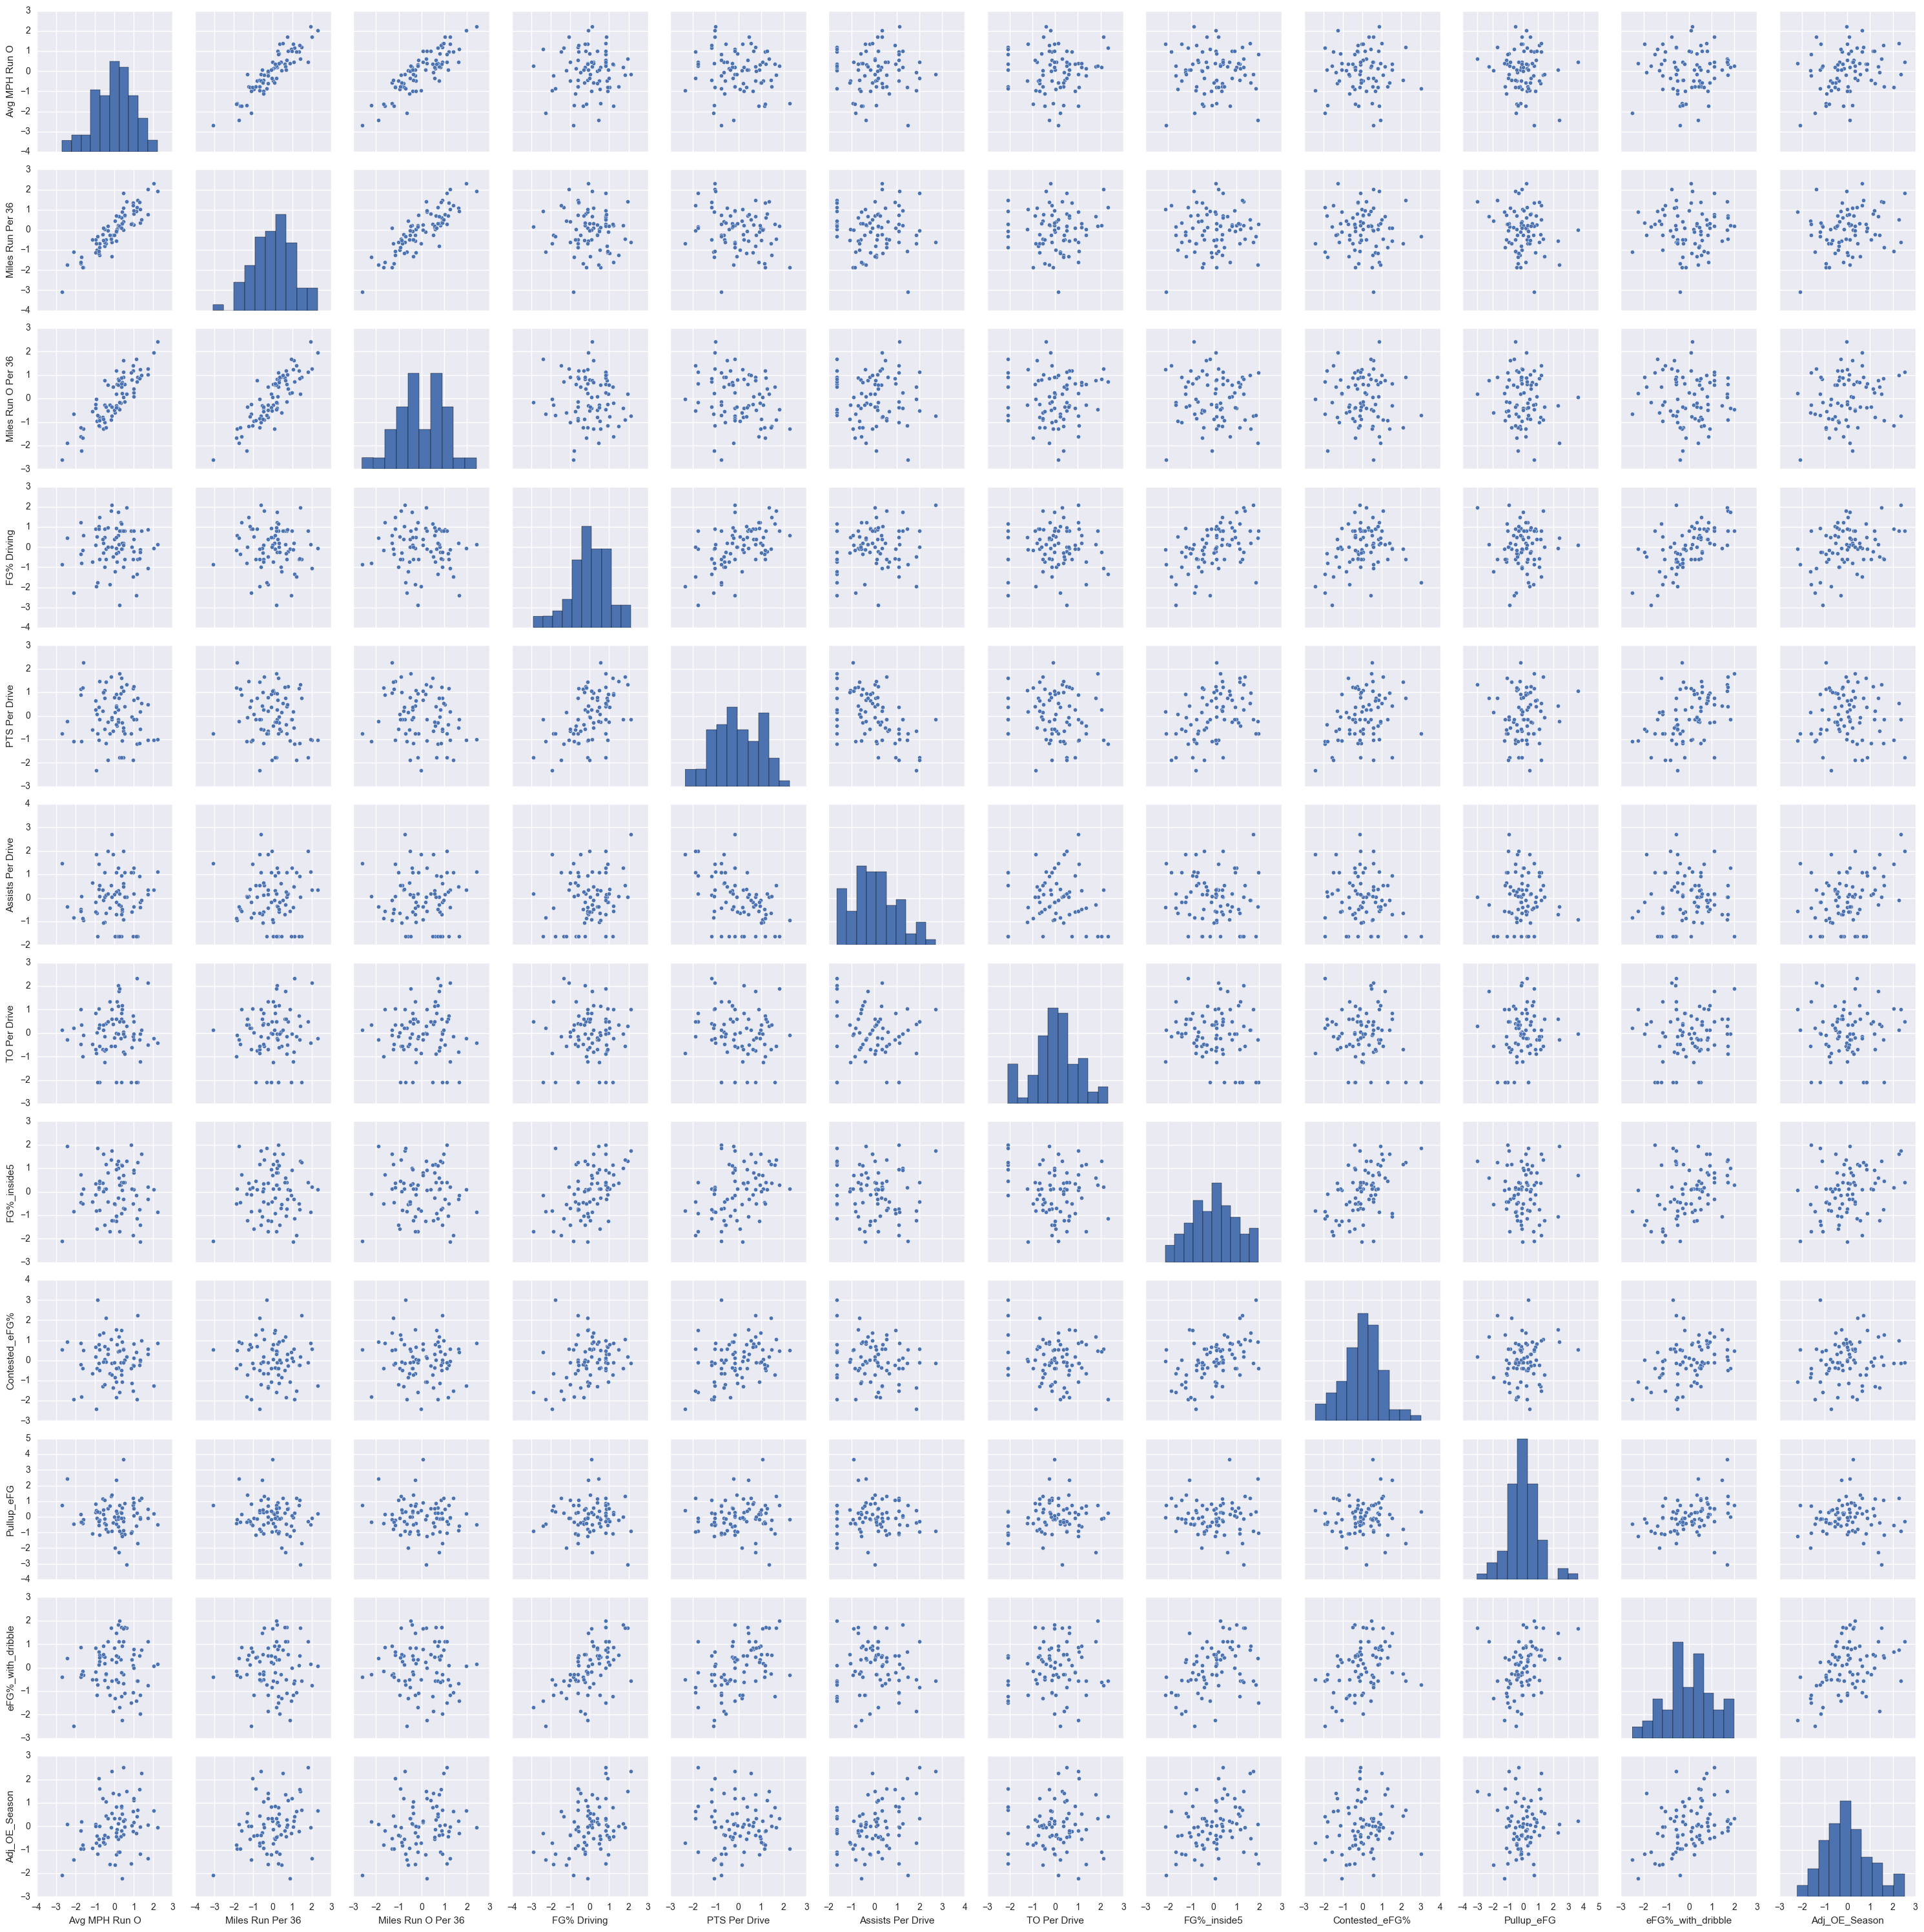

In [10]:
sns.pairplot(scaled_1)

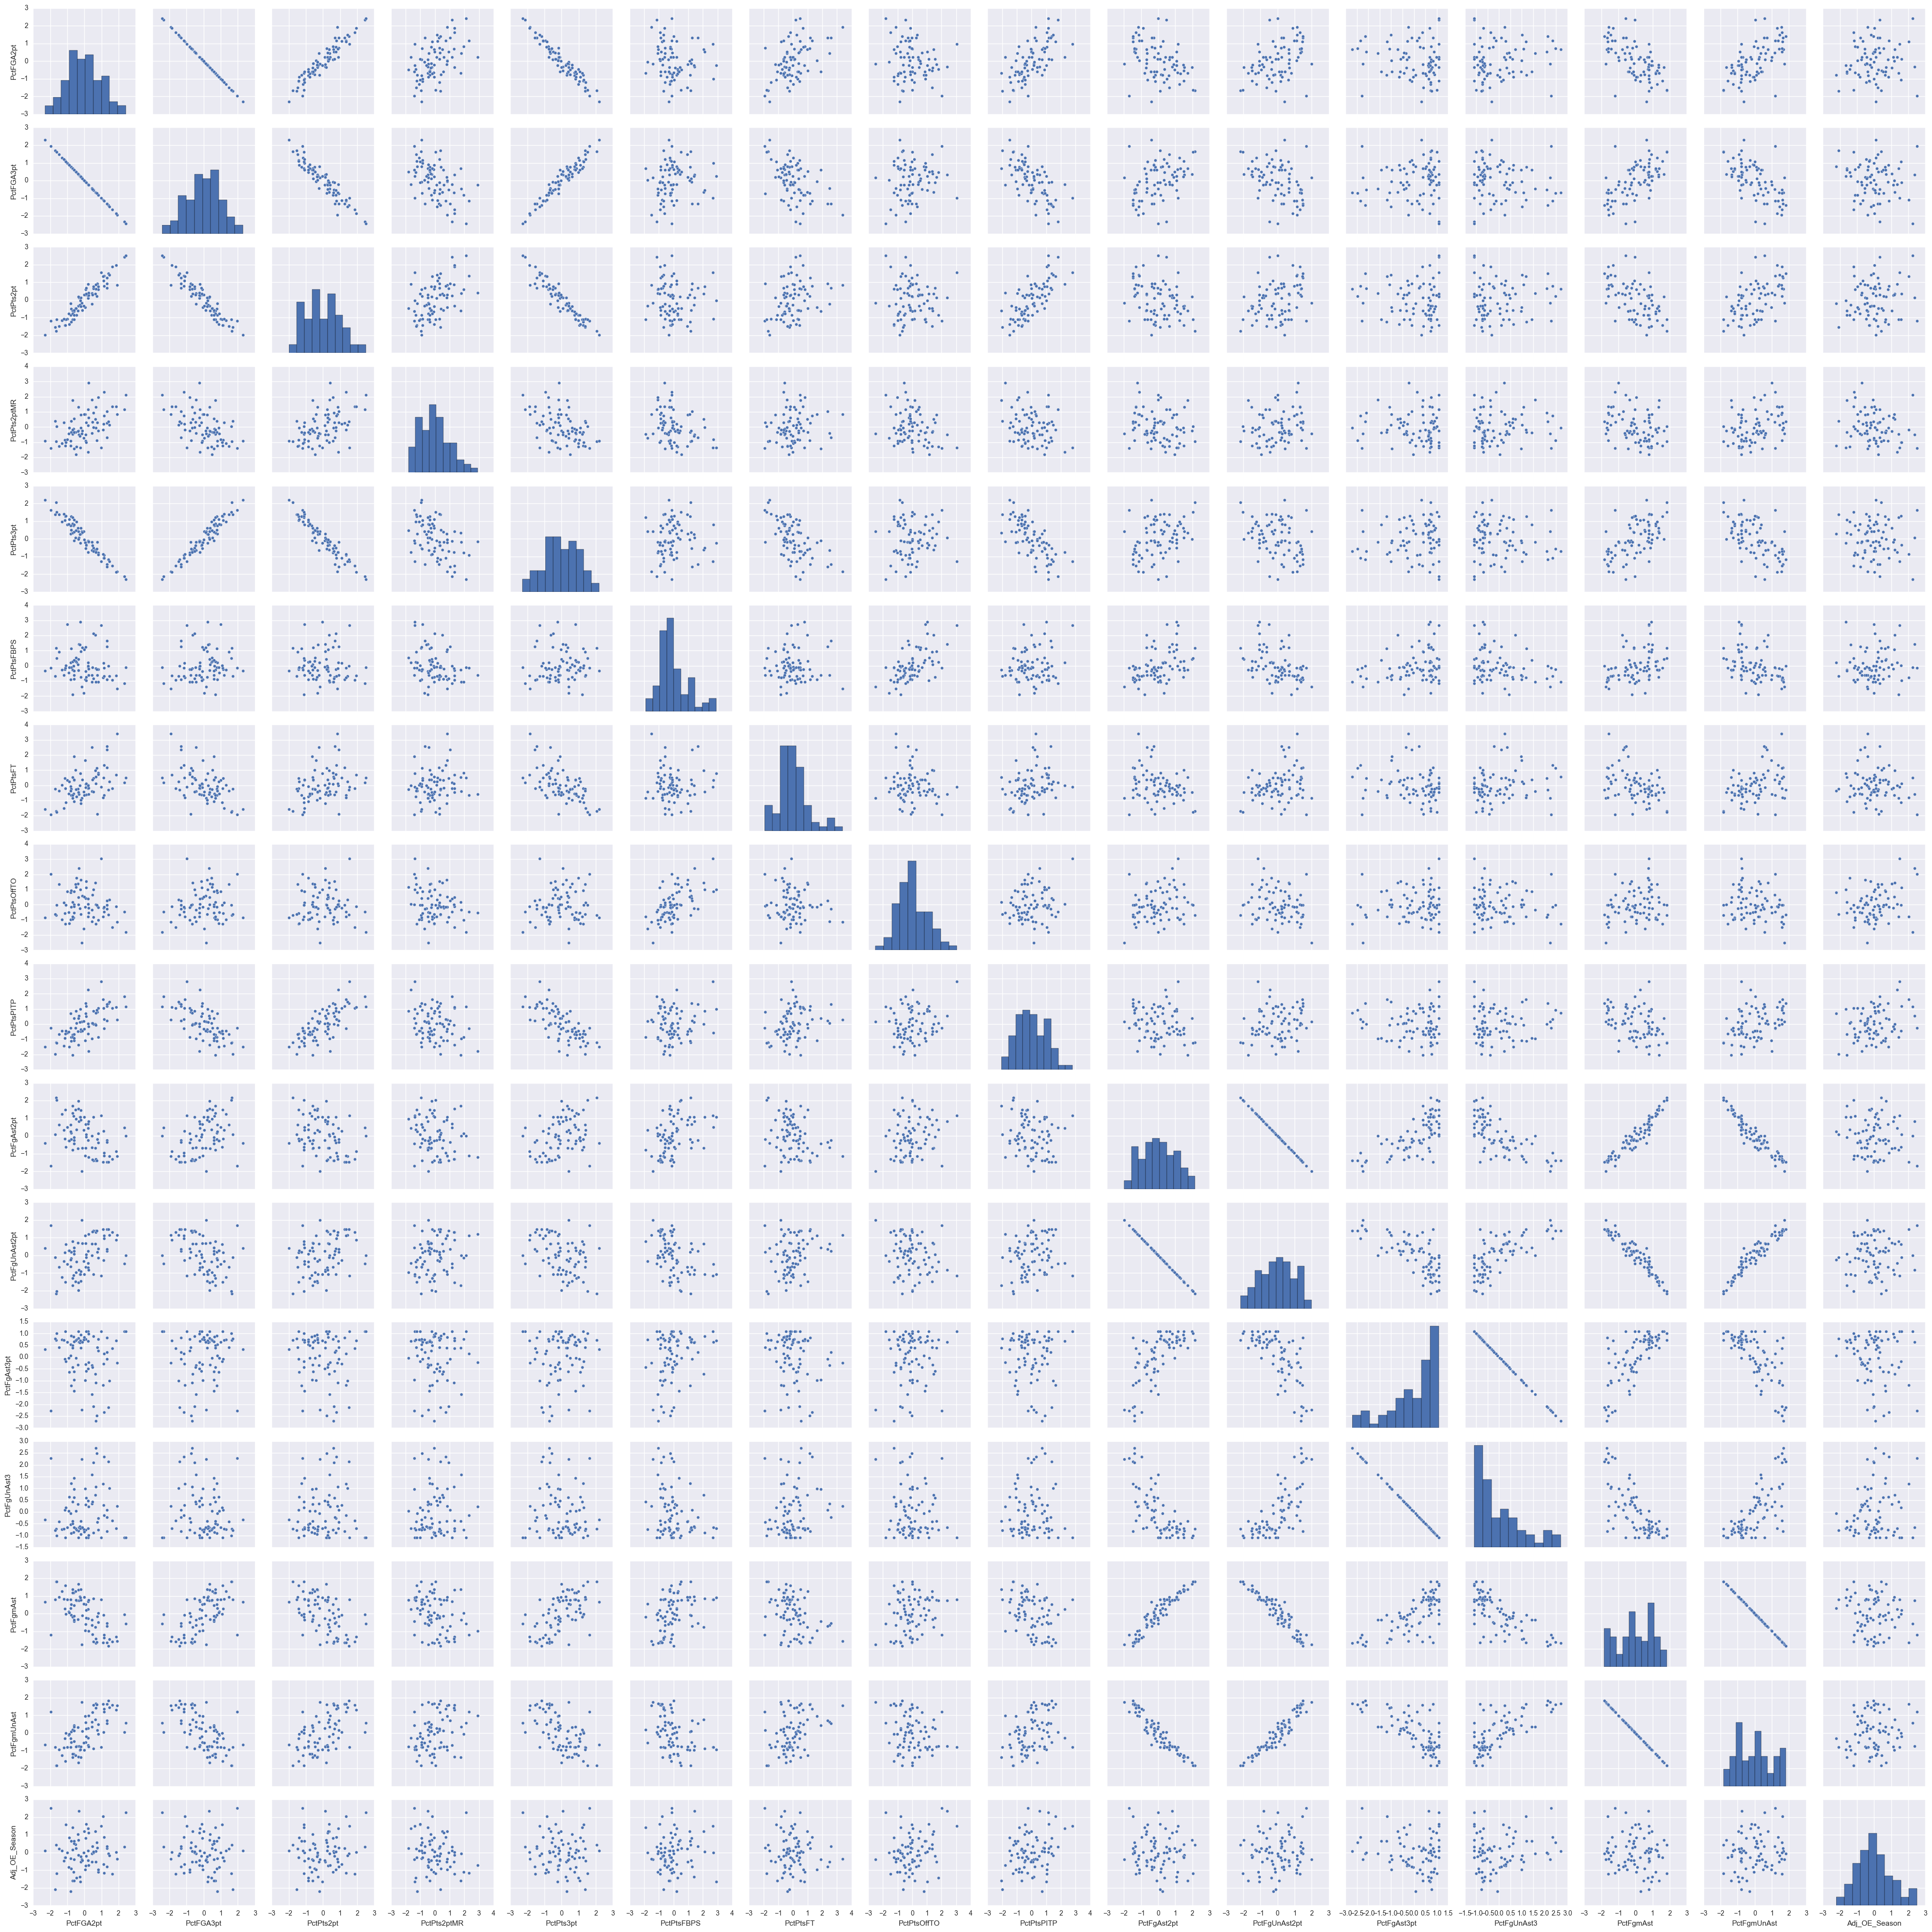

In [11]:
sns.pairplot(scaled_2)

In [12]:
from sklearn.decomposition import PCA

In [13]:
X_s = df_scaled.drop(['Name', 'Adj_OE_wowy', 'Delta_Adj_OE'],axis=1)
X_u = df_unscaled.drop(['Name', 'Adj_OE_wowy', 'Delta_Adj_OE'],axis=1)

y_pca = df_scaled.Delta_Adj_OE

In [14]:
X_pca_s = X_s.corr()
X_pca_u = X_u.corr()

In [15]:
X_pca_s == X_pca_u

,Avg MPH Run O,Miles Run Per 36,Miles Run O Per 36,FG% Driving,PTS Per Drive,Assists Per Drive,TO Per Drive,FG%_inside5,Contested_eFG%,Pullup_eFG,...,PctPtsFT,PctPtsOffTO,PctPtsPITP,PctFgAst2pt,PctFgUnAst2pt,PctFgAst3pt,PctFgUnAst3,PctFgmAst,PctFgmUnAst,Adj_OE_Season
Avg MPH Run O,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Miles Run Per 36,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Miles Run O Per 36,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
FG% Driving,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PTS Per Drive,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Assists Per Drive,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TO Per Drive,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
FG%_inside5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Contested_eFG%,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Pullup_eFG,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
eig_vals, eig_vecs = np.linalg.eig(X_pca_s)
eig_vals1, eig_vecs1 = np.linalg.eig(X_pca_u)
print eig_vals
print eig_vals1

[  7.73073420e+00   4.34249189e+00   3.02310470e+00   2.44208538e+00
   2.07495081e+00   1.29220442e+00   1.18355774e+00   8.98705692e-01
   7.64494327e-01   7.21448962e-01   6.40662717e-01   4.26650965e-01
   3.84388358e-01   2.87771256e-01   2.70162985e-01   2.50896397e-01
   9.97922926e-02   6.88273803e-02   4.68805405e-02   3.97419749e-02
   1.04374185e-02   4.87145717e-06   4.12016659e-06   3.46002383e-07
   2.47969466e-07  -9.86076132e-32   4.08215742e-16]
[  7.73073420e+00 +0.00000000e+00j   4.34249189e+00 +0.00000000e+00j
   3.02310470e+00 +0.00000000e+00j   2.44208538e+00 +0.00000000e+00j
   2.07495081e+00 +0.00000000e+00j   1.29220442e+00 +0.00000000e+00j
   1.18355774e+00 +0.00000000e+00j   8.98705692e-01 +0.00000000e+00j
   7.64494327e-01 +0.00000000e+00j   7.21448962e-01 +0.00000000e+00j
   6.40662717e-01 +0.00000000e+00j   4.26650965e-01 +0.00000000e+00j
   3.84388358e-01 +0.00000000e+00j   2.87771256e-01 +0.00000000e+00j
   2.70162985e-01 +0.00000000e+00j   2.50896397e-0

In [17]:
print eig_vecs

[[ -2.93314736e-02  -6.50265710e-02   5.12170112e-01   4.32247211e-02
    2.15355155e-01  -5.61268006e-02   5.98998099e-02   9.75626092e-02
   -8.47479521e-02   2.06260607e-02  -6.43062529e-02  -8.50561172e-02
    1.66960715e-01   4.35656109e-02   1.13073447e-01   1.53268008e-01
   -1.83220568e-01   3.85204041e-01   6.10813996e-01  -1.66909526e-01
   -1.24906004e-02  -1.02120086e-03  -6.39595523e-04   3.85352442e-04
   -9.43922765e-05   8.51906569e-21  -4.94103667e-13]
 [ -8.11368938e-02  -5.96941864e-02   5.27520918e-01   3.40728875e-02
    1.08077407e-01  -3.66019314e-02   3.19287098e-02   6.02987760e-02
    5.75915200e-02  -8.05378639e-02  -4.82843218e-02  -1.42244655e-01
   -8.68637266e-02   1.39302406e-03  -4.77458652e-02  -4.22877761e-02
   -3.51158006e-01   2.03463769e-01  -6.90248185e-01   8.54650657e-02
    1.72055393e-02   1.14289308e-03  -1.19665994e-03  -2.02717937e-04
    4.19735159e-05  -1.16439904e-17   1.45939025e-12]
 [ -1.46550906e-02  -6.63147104e-03   4.90820628e-01

In [18]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)
value_vector_pairs

[[7.730734203774924,
  array([-0.02933147, -0.08113689, -0.01465509,  0.1903537 ,  0.10403529,
          0.06143618,  0.02259587, -0.03667184,  0.03685311,  0.01782492,
          0.12220291,  0.29489878, -0.29490438,  0.27249996,  0.14867874,
         -0.28865197, -0.12844133,  0.17484407, -0.07730951,  0.18780498,
         -0.28910216,  0.2891189 , -0.20762399,  0.20762851, -0.33492928,
          0.33492928,  0.0580663 ])],
 [4.3424918855553427,
  array([-0.06502657, -0.05969419, -0.00663147, -0.14119384, -0.31017222,
          0.24089691,  0.02285823, -0.27896806, -0.19583357,  0.12445259,
         -0.12465209, -0.21965129,  0.2196384 , -0.26600886, -0.06552124,
          0.25104219, -0.14838843, -0.07835282, -0.09821815, -0.24507488,
         -0.25238752,  0.25239961, -0.28252082,  0.28249708, -0.15526169,
          0.15526169, -0.05095906])],
 [3.0231046998128606,
  array([ 0.51217011,  0.52752092,  0.49082063,  0.0381069 , -0.16780891,
          0.11940642,  0.05497533, -0.0157186

In [19]:
EVSum = sum(eig_vals)
# EV = eigenvalue divided by the sum of all eigenvalues times 100
var_exp = [(i / EVSum)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

[28.632348902870099, 16.083303279834606, 11.196684073380968, 9.04476068239466, 7.6850029952417565, 4.7859423130288876, 4.3835471900722958, 3.3285395995214282, 2.8314604699666206, 2.6720331930480321, 2.3728248790199231, 1.580188758672924, 1.4236605867277343, 1.0658194672338743, 1.000603646969505, 0.92924591633636688, 0.36960108371799849, 0.25491622316496837, 0.17363163132188503, 0.14719249964628903, 0.038657105623218349, 1.8042433980091194e-05, 1.5259876266765577e-05, 1.2814903078465195e-06, 9.1840542797201526e-07, 1.5119101565099253e-15, -3.6521338204676486e-31]


In [20]:
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_s)
skl_pca

array([[-3.23990955,  4.07912955],
       [ 2.35932113,  0.94896426],
       [ 3.02417306, -1.53874315],
       [-0.03159972, -5.76293454],
       [ 1.24167818, -1.52368175],
       [-1.26944844, -0.3127052 ],
       [ 1.53686983, -2.04512165],
       [ 2.6824632 , -0.76783759],
       [-1.08576219, -0.23893439],
       [ 6.21112134,  0.878918  ],
       [ 0.71503174, -3.10431875],
       [ 2.60709734, -1.90679362],
       [-3.54117623, -0.68712074],
       [ 1.00049029, -1.52133295],
       [ 3.32916001, -3.86459516],
       [-1.9718222 ,  0.0630503 ],
       [-5.1186077 , -0.89553352],
       [ 3.14282269,  1.36710896],
       [-4.39209809, -0.60102393],
       [ 2.85773293, -1.54814594],
       [-1.07022606, -1.25566371],
       [ 1.21763343,  1.39875567],
       [-4.56015013, -2.47381563],
       [ 3.12163818,  0.42177565],
       [-2.31124366, -0.24053174],
       [ 0.25436728,  1.56808144],
       [-0.65343659, -1.70669105],
       [ 0.92937949, -1.83475375],
       [ 1.90519976,

In [21]:
pc1 = []
pc2 = []
for pc in skl_pca:
    pc1.append(pc[0])
    pc2.append(pc[1])

In [22]:
#df_scaled['pc1_vals'] = pc1
#df_scaled['pc2_vals'] = pc2

In [25]:
pca.components_

array([[ 0.02933147,  0.08113689,  0.01465509, -0.1903537 , -0.10403529,
        -0.06143618, -0.02259587,  0.03667184, -0.03685311, -0.01782492,
        -0.12220291, -0.29489878,  0.29490438, -0.27249996, -0.14867874,
         0.28865197,  0.12844133, -0.17484407,  0.07730951, -0.18780498,
         0.28910216, -0.2891189 ,  0.20762399, -0.20762851,  0.33492928,
        -0.33492928, -0.0580663 ],
       [-0.06502657, -0.05969419, -0.00663147, -0.14119384, -0.31017222,
         0.24089691,  0.02285823, -0.27896806, -0.19583357,  0.12445259,
        -0.12465209, -0.21965129,  0.2196384 , -0.26600886, -0.06552124,
         0.25104219, -0.14838843, -0.07835282, -0.09821815, -0.24507488,
        -0.25238752,  0.25239961, -0.28252082,  0.28249708, -0.15526169,
         0.15526169, -0.05095906]])

In [26]:
pca.explained_variance_ratio_

array([ 0.28632349,  0.16083303])

### Random Forest Regressor

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score

In [29]:
X = df_scaled.drop(['Name', 'Adj_OE_Season', 'Adj_OE_wowy', 'Delta_Adj_OE'],axis=1)
y = df_scaled.Adj_OE_Season

X_highest = df_scaled[['Avg MPH Run O','Miles Run Per 36', 'FG% Driving', 'Assists Per Drive', 'FG%_inside5', 'eFG%_with_dribble', 'PctPts2pt', 'PctPts2ptMR', 'PctPtsOffTO','PctPtsPITP']]

In [30]:
rfr = RandomForestRegressor(n_jobs=-1)
model_rfr = rfr.fit(X_highest,y)
ypred_rfr = model_rfr.predict(X_highest)

In [31]:
cross_val_score(model_rfr, X_highest, y, cv=3, scoring='r2').mean()

0.035715799648068002

In [32]:
cross_val_score(model_rfr, X_highest, y, cv=3, scoring='mean_squared_error').mean()

-0.89810295665302586

## Support Vector Machine

In [33]:
from sklearn.grid_search import GridSearchCV

In [34]:
svr = SVR()

In [35]:
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
kernels = ['linear','rbf','poly']

In [36]:
gs = GridSearchCV(svr, {'kernel':kernels, 'C':C_vals}, verbose=True, cv=3)
gs.fit(X,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    8.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [37]:
gs.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [38]:
svr = SVR(kernel='rbf',C=1)
model_svr = svr.fit(X,y)
ypred_svr = model_svr.predict(X)

In [39]:
cross_val_score(model_svr, X, y, cv=3, scoring='r2').mean()

0.1339557331147577

In [40]:
cross_val_score(model_svr, X, y, cv=3, scoring='mean_squared_error').mean()

-0.82846729013018494

In [41]:
r2_score(y,ypred_svr)

0.73078186532010392

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
model_lr = lr.fit(X_highest,y)
ypred_lr = model_lr.predict(X_highest)

In [44]:
r2_score(y,ypred_lr)

0.47640079281351633

In [45]:
cross_val_score(model_lr, X_highest, y, cv=3, scoring='r2').mean()

0.033568690641871214

In [ ]:
scrape the general stats from nba.com so i can get an OE for each year. 

it has been throw around how mid range shots are bad, notably the rockets, which appears to be somewhat true based on my analysis, but this correlation doesnt appear to be quite as strong as some make out to be. 

the correlation with points per shot may be stronger than with OE because OE has other factors built in such as TO and ORB and maybe their OE would be higher if they took less mid range shots. however, at least on the individual level, it's not completely conclusive to avoid mid range shots.